Decision Tree is used to classify complex data models, which are too complicated and mixed up for Classification Regression

Go through codebasics video, for more info

In [1]:
url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/9_decision_tree/salaries.csv"

In [2]:
import pandas as pd

salaries = pd.read_csv(url)
salaries.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs = salaries.drop('salary_more_then_100k', axis='columns')
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [4]:
output = salaries['salary_more_then_100k']
output.head()

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [7]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])

In [9]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


Companies:
- Google = 2
- Facebook = 1
- ABC = 0

Job:
- SE = 2
- CP = 1
- BM = 0

Degree:
- Bac = 0
- Masters = 1

In [10]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [11]:
from sklearn import tree

In [12]:
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs_n, output)

DecisionTreeClassifier()

In [14]:
model.score(inputs_n, output)

1.0

In [15]:
# we are using our training dataset itself, so score is 1

In [17]:
model.predict([[2, 1, 0]])
# CP in Google, Bachelors

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# Titanic Survival Prediction

In [18]:
url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/9_decision_tree/Exercise/titanic.csv"

In [21]:
titanic_source_df = pd.read_csv(url)

In [22]:
titanic_source_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic_source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
titanic_df = titanic_source_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns')
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [33]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   sex_n     891 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [36]:
# let's fill NA Ages

mean_age = titanic_df.Age.mean()
titanic_df.Age = titanic_df.Age.fillna(mean_age)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   sex_n     891 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [37]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()

titanic_df['sex_n'] = le_sex.fit_transform(titanic_df['Sex'])
titanic_df

,Survived,Pclass,Sex,Age,Fare,sex_n
0,0,3,male,22.000000,7.2500,1
1,1,1,female,38.000000,71.2833,0
2,1,3,female,26.000000,7.9250,0
3,1,1,female,35.000000,53.1000,0
4,0,3,male,35.000000,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,1
887,1,1,female,19.000000,30.0000,0
888,0,3,female,29.699118,23.4500,0
889,1,1,male,26.000000,30.0000,1


In [38]:
inputs = titanic_df.drop(['Sex', 'Survived'], axis='columns')
output = titanic_df['Survived']

In [39]:
inputs.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [40]:
output.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [41]:
from sklearn import tree

titanic_model = tree.DecisionTreeClassifier()

In [42]:
from sklearn.model_selection import train_test_split
ip_train, ip_test, op_train, op_test = train_test_split(inputs, output, test_size=0.2)

In [43]:
titanic_model.fit(ip_train, op_train)

DecisionTreeClassifier()

In [44]:
titanic_model.score(ip_test, op_test)

0.7932960893854749

In [47]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(true_values, predicted_values)
cm = confusion_matrix(op_test, titanic_model.predict(ip_test))
cm

array([[95, 12],
       [25, 47]])

Text(95.72222222222221, 0.5, 'Truth')

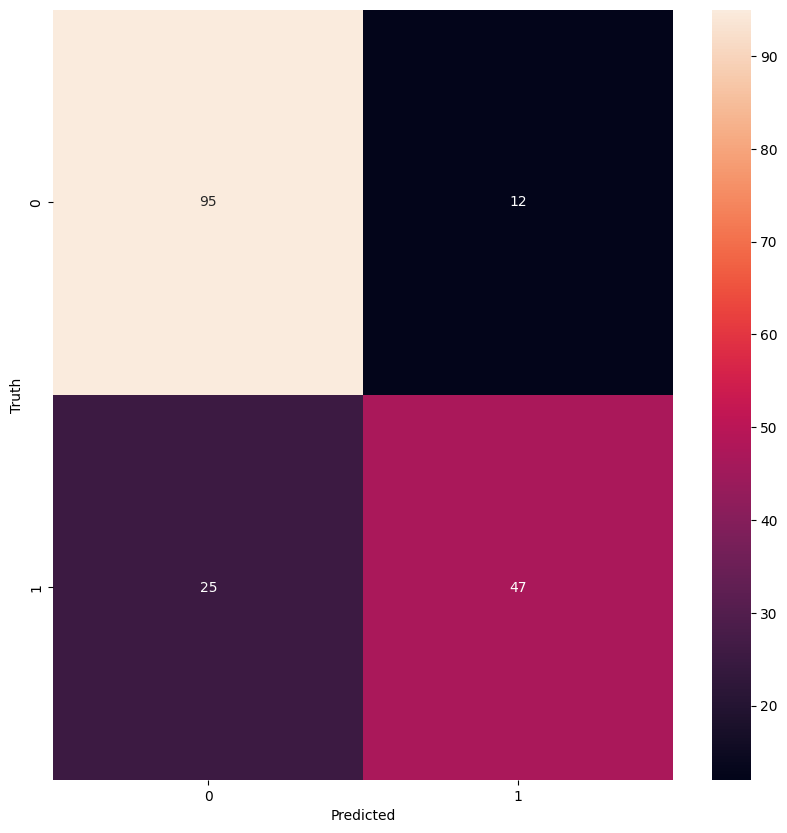

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Can see lot of blunders, that's why score is low.